# Prediction Model



In [1]:
# importing librairies ...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

# %matplotlib notebook

In [2]:
# The first step is to retrieve cleaned data 
df = pd.read_csv('./dataset/immoCollect52-clean.csv', index_col = 0)

## Cleaning / manipulation 

First, I'm going to do a little data cleansing to make sure that it corresponds precisely to my expectations for this project.

In [3]:
print(df.shape)
df.head()

(40791, 17)


,postal_code,type_of_property,price,number_of_bedroom,house_area,fully_equipped_kitchen,terrace,garden,is_new,locality,district,province,province_int,region,region_int,district_int,ratio_free_build
6,1650,0,525000,4,220,1,1,1,0,Beersel,Hal-Vilvorde,brabant-flamand,5.0,flandre,0.0,8.0,-2.851322
9,1332,0,549000,4,210,1,1,1,1,Rixensart,Nivelles,brabant-wallon,8.0,wallonie,1.0,4.0,-3.410265
10,8310,0,519000,3,273,1,0,1,1,Brugge,Brugge,flandre-occidentale,0.0,flandre,0.0,28.0,-2.429051
12,8200,0,535000,4,200,1,1,1,1,Brugge,Brugge,flandre-occidentale,0.0,flandre,0.0,28.0,-2.429051
13,1421,0,105000,1,82,0,0,1,0,Braine-l'Alleud,Nivelles,brabant-wallon,8.0,wallonie,1.0,4.0,-2.645463


In [4]:
# I retrieve only utils columns for my model
df = df.iloc[:,0:9]
df.drop(columns=['fully_equipped_kitchen'],inplace=True)

In [5]:
df_house = df[df['type_of_property'] == 0]
df_apartment = df[df['type_of_property'] == 1]

In [6]:
df_apartment.head()

,postal_code,type_of_property,price,number_of_bedroom,house_area,terrace,garden,is_new
5519,4000,1,45000,1,47,1,0,0
5520,4020,1,25000,1,125,1,0,1
5521,4020,1,25000,3,142,1,0,1
5523,6180,1,20000,1,115,0,1,0
5524,1030,1,50000,2,96,0,0,0


## Let's train and predict for HOUSE !

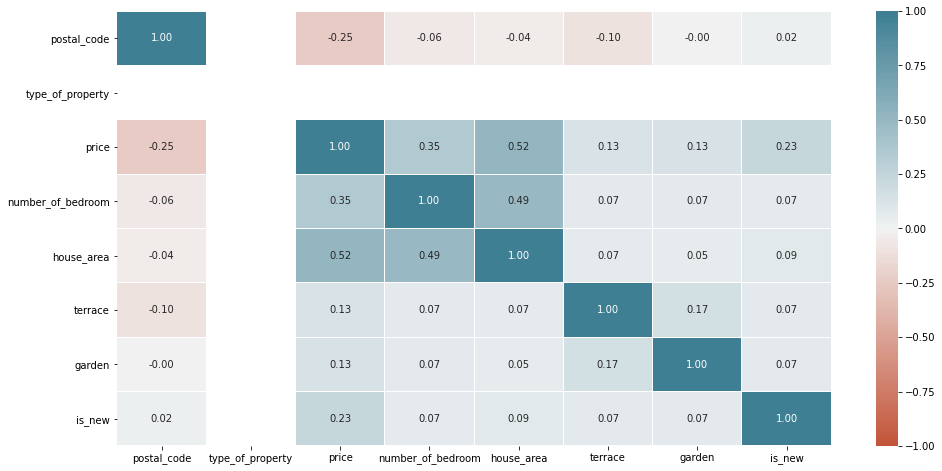

In [7]:
# Print the heatmap
plt.subplots(figsize=(16, 8))   
sns.heatmap(df_house.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

In [8]:
X = df_house.drop(columns='price')
X.head()

,postal_code,type_of_property,number_of_bedroom,house_area,terrace,garden,is_new
6,1650,0,4,220,1,1,0
9,1332,0,4,210,1,1,1
10,8310,0,3,273,0,1,1
12,8200,0,4,200,1,1,1
13,1421,0,1,82,0,1,0


In [9]:
y = df_house[['price']]
y.head()

,price
6,525000
9,549000
10,519000
12,535000
13,105000


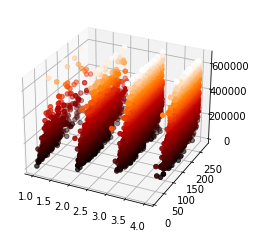

In [10]:
# %matplotlib notebook
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter3D( X['number_of_bedroom'],X['house_area'], y, c=y, cmap='gist_heat')
ax.view_init(27, -64)

### Split the dataset

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [12]:
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train) # Entrainement du model

LinearRegression()

In [13]:
score = regressor.score(X_train,y_train)
score

0.37416941711970675

In [14]:
score = regressor.score(X_test,y_test)
score

0.3799975391876349

### 2. With polynomial regression

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree = 5

pipe=make_pipeline(PolynomialFeatures(degree),LinearRegression())

In [16]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

In [17]:
pipe.score(X_train, y_train)

0.48862299537383813

In [18]:
pipe.score(X_test, y_test)

0.4677268376558561

### 3. KNN Regressor

In [19]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [20]:
knn.score(X_train, y_train)

0.6985415262929952

In [21]:
knn.score(X_test, y_test)

0.5349389526049577

### 4. Decision Trees

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

regressor = DecisionTreeRegressor(random_state=42, max_depth=9, min_samples_split=20)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, min_samples_split=20, random_state=42)

In [23]:
regressor.score(X_train, y_train)

0.61381179145999

In [24]:
regressor.score(X_test, y_test)

0.539396674651222

### 5. Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)

<ipython-input-25-158bccde1789>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X, y)


RandomForestRegressor(max_depth=2, random_state=0)

In [26]:
regr.score(X_train, y_train)

0.3518189493009528

In [27]:
regr.score(X_test, y_test)

0.35410552965424114

### 6.Gradient boost

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
reg.fit(X_train, y_train)

/home/leersla/Desktop/Turing4/ImmoEliza-API/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(n_estimators=1000, random_state=0)

In [29]:
reg.score(X_train, y_train)

0.7019616423420297

In [30]:
reg.score(X_test, y_test)

0.6246908625098362

### 7. XGB

In [31]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
xgb_model.score(X_train, y_train)

0.7682738699029228

In [33]:
xgb_model.score(X_test, y_test)

0.6241225712143685